# Stock Price Prediction

### Problem Statement: 

Use the daily [Open, High, Low, Volume] to predict [Close] on that day using Regression models.

### Models Used:

LINEAR REGRESSION

LASSO REGRESSION

RIDGE REGRESSION

### Dataset Description:

Yahoo Finance Apple Dataset

https://finance.yahoo.com/quote/AAPL/history?p=AAPL

Dataset collected of past 5 years to predict results.



# Import Required Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import datetime
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import warnings
warnings.filterwarnings('ignore')

# Regression chart Function

In [0]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

## Yahoo! Finance market data downloader +fix for Pandas Datareader's get_data_yahoo()

## !pip install yfinance --upgrade --no-cache-dir

In [0]:
# !pip install yfinance --upgrade --no-cache-dir

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive"


Mounted at /content/drive
/content/drive/My Drive


## Collect data for training by incuding the start date


In [5]:
yf.pdr_override()
df = pdr.get_data_yahoo("AAPL", start="2014-09-08").reset_index()
df.to_csv('AAPL.csv',index=False)
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-08,99.300003,99.309998,98.050003,98.360001,90.254837,46356700
1,2014-09-09,99.080002,103.080002,96.139999,97.989998,89.915321,189846300
2,2014-09-10,98.010002,101.110001,97.760002,101.000000,92.677299,100869600
3,2014-09-11,100.410004,101.440002,99.620003,101.430000,93.071877,62353100
4,2014-09-12,101.209999,102.190002,101.080002,101.660004,93.282913,62626100


In [6]:
df.shape

(1259, 7)

In [7]:
type(df)

pandas.core.frame.DataFrame

## Remove adj_close  and  data

In [0]:
## make a copy of dataframe and then do datapreprocessing

In [9]:
df_new = df.copy()
df_new.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-08,99.300003,99.309998,98.050003,98.360001,90.254837,46356700
1,2014-09-09,99.080002,103.080002,96.139999,97.989998,89.915321,189846300
2,2014-09-10,98.010002,101.110001,97.760002,101.000000,92.677299,100869600
3,2014-09-11,100.410004,101.440002,99.620003,101.430000,93.071877,62353100
4,2014-09-12,101.209999,102.190002,101.080002,101.660004,93.282913,62626100


In [10]:
df_new=df_new.drop(['Date', 'Adj Close'], axis=1)
df_new.head()

,Open,High,Low,Close,Volume
0,99.300003,99.309998,98.050003,98.360001,46356700
1,99.080002,103.080002,96.139999,97.989998,189846300
2,98.010002,101.110001,97.760002,101.000000,100869600
3,100.410004,101.440002,99.620003,101.430000,62353100
4,101.209999,102.190002,101.080002,101.660004,62626100


In [11]:
df_new.shape

(1259, 5)

## Check for null values

In [12]:
df_new.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Normalize values

In [0]:
#ZScore for Numeric columns
def Z_score(column):
    df_new[column] = zscore(df_new[column])

In [0]:
num_col_zscore = ['Open','High','Low','Volume']
for i in num_col_zscore:
    Z_score(i)

In [15]:
df_new.head()

,Open,High,Low,Close,Volume
0,-1.232139,-1.254421,-1.242123,98.360001,0.452465
1,-1.238028,-1.154473,-1.293695,97.989998,7.980980
2,-1.266670,-1.206700,-1.249953,101.000000,3.312611
3,-1.202426,-1.197952,-1.199732,101.430000,1.291753
4,-1.181011,-1.178068,-1.160311,101.660004,1.306077


## Create x and y values for training

In [0]:
df_input = df_new[['Open','High','Low','Volume']]

In [17]:
df_input.head()

,Open,High,Low,Volume
0,-1.232139,-1.254421,-1.242123,0.452465
1,-1.238028,-1.154473,-1.293695,7.980980
2,-1.266670,-1.206700,-1.249953,3.312611
3,-1.202426,-1.197952,-1.199732,1.291753
4,-1.181011,-1.178068,-1.160311,1.306077


In [0]:
df_output = df_new['Close']

In [19]:
df_output.head()

0     98.360001
1     97.989998
2    101.000000
3    101.430000
4    101.660004
Name: Close, dtype: float64

## Create numpy arrays of input values and output

In [0]:
##create numpy arrays of input values and output

In [0]:
x = df_input.values

In [0]:
y=df_output.values

## spliting data for training and testing using train_test_split

In [0]:
## spliting data for training and testing

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
x_train.shape

(881, 4)

In [26]:
y_train.shape

(881,)

In [27]:
x_test.shape

(378, 4)

In [28]:
y_train.shape

(881,)

## Linear Regression

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
stock_regr = linear_model.LinearRegression()

# Fit regression model to the training set
stock_regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = stock_regr.predict(x_test)

## Model evaluation

In [31]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 0.7183
R-squared = 0.9996


In [32]:
for i in range(10):
    print("True_price:",y_test[i], "Predicted_price:",y_pred[i])

True_price: 112.010002 Predicted_price: 112.39034331858623
True_price: 232.07000699999998 Predicted_price: 232.43720239738178
True_price: 108.699997 Predicted_price: 108.20913294689903
True_price: 146.580002 Predicted_price: 146.66802951072316
True_price: 117.339996 Predicted_price: 117.43413971157685
True_price: 118.629997 Predicted_price: 117.38779563191716
True_price: 178.240005 Predicted_price: 178.35337580380252
True_price: 202.58999599999999 Predicted_price: 203.70870366751814
True_price: 155.300003 Predicted_price: 155.12301451954679
True_price: 93.400002 Predicted_price: 94.03513643137487


In [33]:
# Display model parameters
print('Slope = ', stock_regr.coef_)
print('Intercept = ', stock_regr.intercept_)

Slope =  [-20.66393389  30.04811067  27.95129932  -0.07688911]
Intercept =  145.382965396411


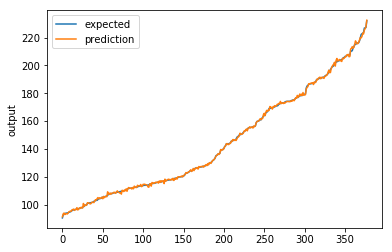

In [34]:
# Graph the regression model to see the relationship between the predicted and expected values
chart_regression(y_pred,y_test)

## Lasso Regression

In [35]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred = clf.predict(x_test)

## Model Evaluation

In [37]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 1.0412
R-squared = 0.9992


In [38]:
for i in range(10):
    print("True_price:",y_test[i], "Predicted_price:",y_pred[i])

True_price: 112.010002 Predicted_price: 112.67688133192038
True_price: 232.07000699999998 Predicted_price: 231.12375555051855
True_price: 108.699997 Predicted_price: 108.40589848025868
True_price: 146.580002 Predicted_price: 146.01625727212604
True_price: 117.339996 Predicted_price: 117.37445949444239
True_price: 118.629997 Predicted_price: 117.69676372025714
True_price: 178.240005 Predicted_price: 177.4768129264371
True_price: 202.58999599999999 Predicted_price: 204.68419613955965
True_price: 155.300003 Predicted_price: 154.93514521399865
True_price: 93.400002 Predicted_price: 93.3967112184468


In [39]:
# Display model parameters
print('Slope = ', clf.coef_)
print('Intercept = ', clf.intercept_)

Slope =  [ 3.73255764 25.05562414  8.40001987 -0.29260851]
Intercept =  145.38886161085162


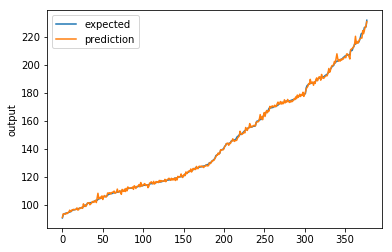

In [40]:
# Graph the regression model to see the relationship between the predicted and expected values
chart_regression(y_pred,y_test)

## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=1.0)

clf_ridge.fit(x_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred = clf_ridge.predict(x_test)

## Model Evaluation

In [43]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 0.9864
R-squared = 0.9993


Root mean squared error = 0.9864
R-squared = 0.9993


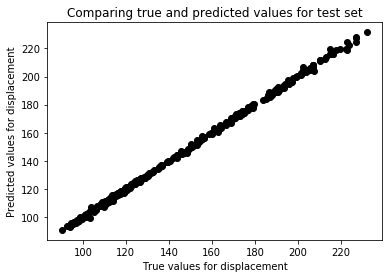

In [44]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for displacement')
plt.ylabel('Predicted values for displacement')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [45]:
# Display model parameters
print('Slope = ', clf_ridge.coef_)
print('Intercept = ', clf_ridge.intercept_)

Slope =  [ 2.61973489 17.25812765 17.44051237 -0.15117576]
Intercept =  145.38792561244514


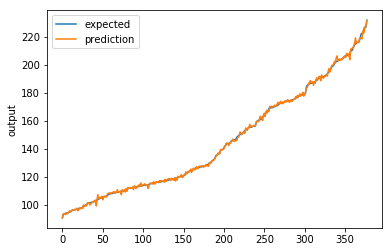

In [46]:
# Graph the regression model to see the relationship between the predicted and expected values
chart_regression(y_pred,y_test)